   # TP53: Effects of Mutation on TP53

<b>Standard imports for playing with and plotting data frames.</b>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

<b>Import CPTAC data</b>

In [2]:
import CPTAC

Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [3]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

## TP53 mutation effect on p53 protein abundance

### Set gene and protein(s) of interest--in this case we are only looking at TP53--and then create the "cross" dataframe, which contains all the information we need for plotting this gene

In [8]:
gene = "TP53"
protList = ["BCL2"]
cross = CPTAC.merge_mutations(proteomics, protList[0], gene)
cross = cross[["Mutation", protList[0]]].dropna(axis=0)

### Perform a t-test with mutated and non-mutated protein levels

In [9]:
for protein in protList:
    mutated = cross.loc[cross["Mutation"] != "Wildtype"]
    wt = cross.loc[cross["Mutation"] == "Wildtype"]
    ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
    print("Test for " + protein + ": ")
    print(ttest)

Test for BCL2: 
Ttest_indResult(statistic=-1.0541013269914632, pvalue=0.29425610149911247)


### We can now plot the data and see that TP53 has a significantly higher abundance when it is mutated (missense mutations specifically)

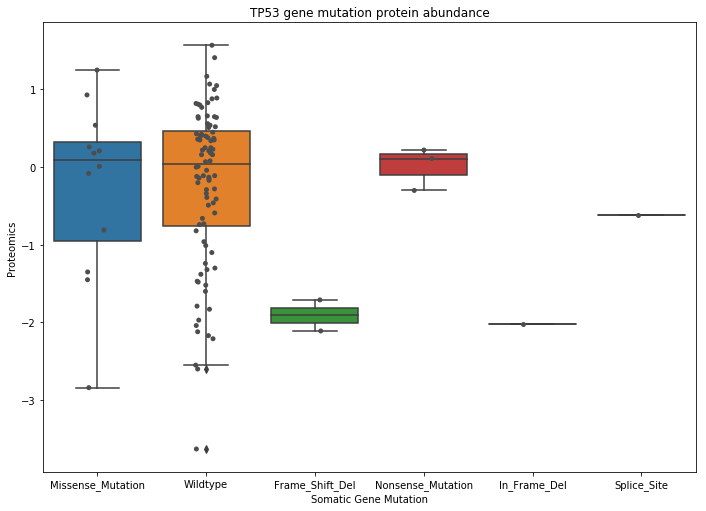

In [11]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=cross, x="Mutation",y=protList[0], ax = ax)
somatic_boxplot.set_title("TP53 gene mutation protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x="Mutation", y=protList[0], jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

### Let's look at the p-value and plot for missense mutations specifically

In [12]:
mutated = cross.loc[cross["Mutation"] == "Missense_Mutation"]
wt = cross.loc[cross["Mutation"] == "Wildtype"]
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
print("Test for " + protein + ": ")
print(ttest)

Test for BCL2: 
Ttest_indResult(statistic=-0.11836124091812589, pvalue=0.9060237035020066)


In [9]:
missense_only = cross.loc[(cross["Mutation"] == "Wildtype") | (cross["Mutation"] == "Missense_Mutation")]

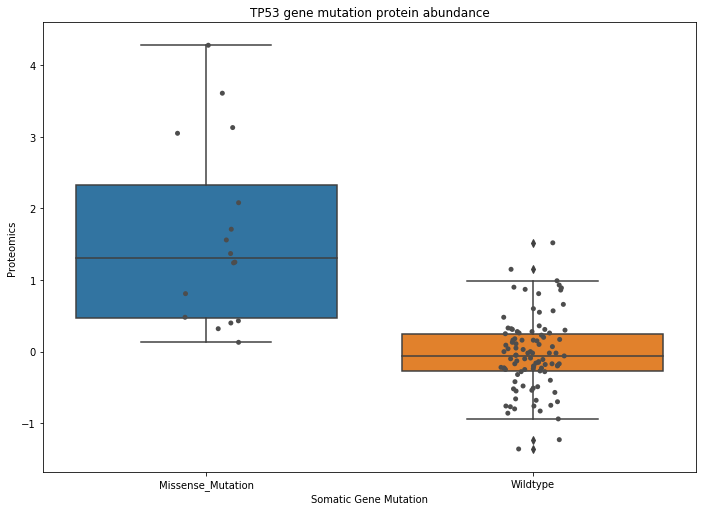

In [10]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=missense_only, x="Mutation",y=gene, ax = ax)
somatic_boxplot.set_title("TP53 gene mutation protein abundance")
somatic_boxplot = sns.stripplot(data=missense_only, x="Mutation", y=gene,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

## TP53 mutation effect on p53 phosphorylation levels

### Create a new "phos_cross" dataframe, which contains all phosphorylation sites on p53. We do this using the same CPTAC function as before, except we pass in the phosphoproteomics data

In [14]:
phos_cross = CPTAC.merge_mutations(phos, protList[0], gene)
phos_cross.head()

,BCL2L11-S104,BCL2L11-S77,BCL2L11-Y96,BCL2L12-S195,BCL2L12-S242,BCL2L12-S273,BCL2L13-S315,BCL2L13-S327,BCL2L13-S329,BCL2L13-S395,BCL2L13-S444,BCL2L13-S450,BCL2L13-S468,Mutation
S001,0.00,NaN,-0.02,NaN,0.55,0.27,0.39,NaN,0.36,0.79,0.18,-0.03,0.53,Missense_Mutation
S002,0.81,0.97,NaN,1.66,1.14,0.22,0.36,0.21,0.35,0.45,-0.01,-0.03,-0.35,Wildtype
S003,0.66,0.62,0.64,NaN,0.70,0.50,-0.26,0.09,0.15,-0.45,0.42,0.39,0.05,Wildtype
S004,NaN,-0.07,-0.15,NaN,0.11,NaN,0.79,NaN,0.65,NaN,-0.06,-0.50,0.08,Wildtype
S005,-0.27,-1.04,2.30,0.63,-0.08,0.89,0.46,0.59,0.40,1.81,1.35,1.36,0.47,Missense_Mutation


### t-test and plot for this site
<b>Note: The wildtype plot comes first in this one because that is what comes first in the dataframe (S001 measurement for phoshporylation was NaN and so it was dropped)</b>

In [18]:
for site in phos_cross.columns:
    if (site is not 'Mutation'):
        sitedf = CPTAC.merge_mutations(phos, site, gene)
        mutateddf = sitedf.loc[sitedf['Mutation'] == 'Missense_Mutation'].dropna(axis=0)
        wtdf = sitedf.loc[sitedf['Mutation'] == 'Wildtype'].dropna(axis=0)
        ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
        print("Test for " + site + ": ")
        print(ttest) 

Test for BCL2L11-S104: 
Ttest_indResult(statistic=1.586192747919616, pvalue=0.11770260322960407)
Test for BCL2L11-S77: 
Ttest_indResult(statistic=-0.2725024377006913, pvalue=0.7859558161719036)
Test for BCL2L11-Y96: 
Ttest_indResult(statistic=1.7886541976980486, pvalue=0.07799731835256912)
Test for BCL2L12-S195: 
Ttest_indResult(statistic=0.18845402095070674, pvalue=0.8510739264391884)
Test for BCL2L12-S242: 
Ttest_indResult(statistic=1.24278080394135, pvalue=0.2164766394486541)
Test for BCL2L12-S273: 
Ttest_indResult(statistic=2.902589358247638, pvalue=0.004544501658568895)
Test for BCL2L13-S315: 
Ttest_indResult(statistic=1.4723499282272101, pvalue=0.14375619986354063)
Test for BCL2L13-S327: 
Ttest_indResult(statistic=1.5481990976395976, pvalue=0.1260838885516715)
Test for BCL2L13-S329: 
Ttest_indResult(statistic=1.023495353844786, pvalue=0.3084715222597549)
Test for BCL2L13-S395: 
Ttest_indResult(statistic=1.2249337757297434, pvalue=0.22308173729814615)
Test for BCL2L13-S444: 
Ttest

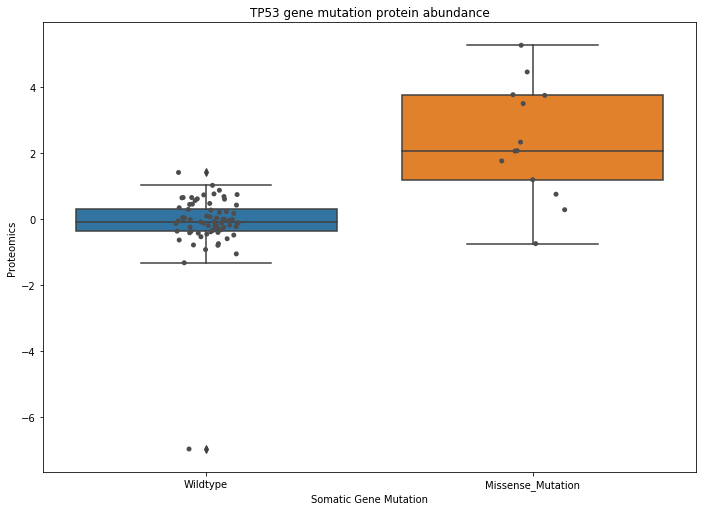

In [14]:
site_missense_only = sites.loc[(sites["Mutation"] == "Wildtype") | (sites["Mutation"] == "Missense_Mutation")]

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=site_missense_only, x="Mutation",y=phosphosite, ax = ax)
somatic_boxplot.set_title("TP53 gene mutation protein abundance")
somatic_boxplot = sns.stripplot(data=site_missense_only, x="Mutation", y=phosphosite,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

### We see that this site is generally phosphorylated at higher levels when TP53 is mutated